# Homework 3 -- Problem 1

In [1]:
%matplotlib notebook

In [5]:
# imports
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.animation as animation
import seaborn as sns

import unyt
#from geopy import distance

# Init

In [6]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('notebook')

# Problem 1

## Our soutions for the baroclinic waves are:

## $\eta = \hat \eta \exp i(k_{x} x - \omega t)$ in Layer 1

## $h = \hat h \exp i(k_{x} x - \omega t)$ in Layer 2

## with $\hat h = - \frac{g}{g'} \frac{H_1 + H_2}{H_2} \hat \eta$

## Let's code those up with a few hand-picked values for the layers and the waves themselves

In [7]:
omega = 1./10
kx = 1./10
#
H1 = 50.
H2 = 100.
eta_hat = 1.
g_over_gp = 10 # Reduced so we can see both waves
h_hat = - g_over_gp * (H1+H2)/H2 * eta_hat

In [8]:
def calc_eta(t, x):
    eta = eta_hat * np.cos(kx*x - omega*t)
    return eta

In [9]:
def calc_h(t, x):
    h = h_hat * np.cos(kx*x - omega*t) - H1
    return h

In [10]:
def calc_u(t, scale=0.1):
    return scale*calc_eta(t, 0.)

## Plot one set

In [11]:
x = np.linspace(0., 100., 1000)
t = 0.

<IPython.core.display.Javascript object>


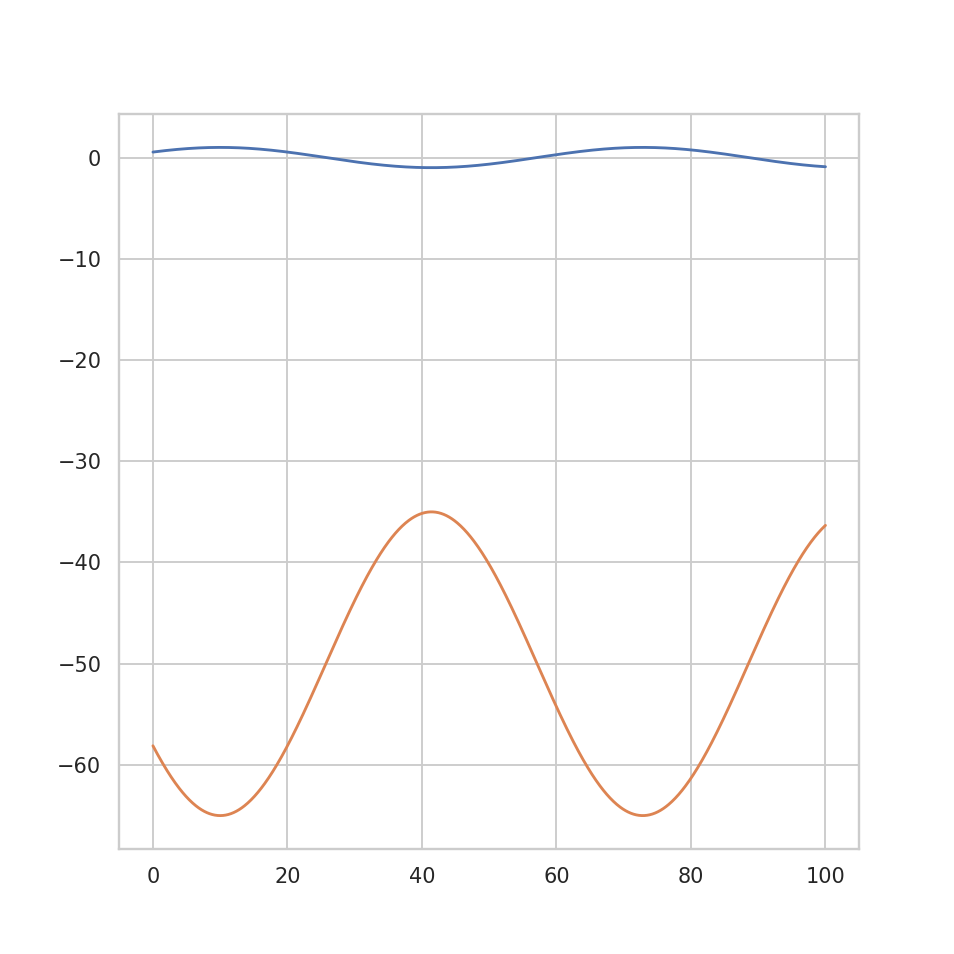

In [12]:
t += 10.
fig = plt.figure(figsize=(7,7))
ax = plt.gca()

eta = calc_eta(t, x)
h = calc_h(t,x)
#
ax.plot(x, eta, label=r'$\eta$')
ax.plot(x, h, label='h')
#
#
plt.show()

## Movie time

<IPython.core.display.Javascript object>


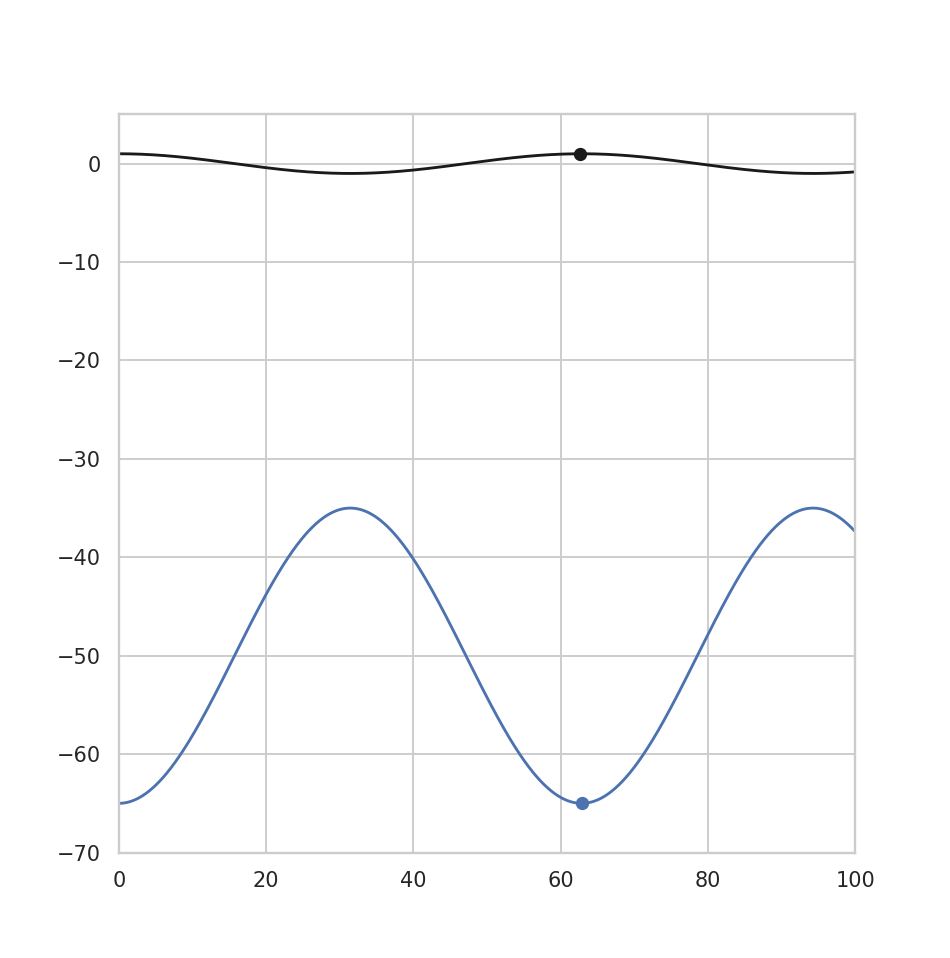

In [35]:
x1 = [2*np.pi / kx]
x2 = [x1[0]]

fig, ax = plt.subplots(figsize=(6,6))
line1, = ax.plot([], [], 'k-')
line2, = ax.plot([], [], 'b-')
point1, = ax.plot([], [], 'o', color='k')
point2, = ax.plot([], [], 'o', color='b')

ax.set_xlim(0., 100)
ax.set_ylim(-70, 5.)

def update_x(time, dtime=1.):
    up1 = calc_u(time-dtime)
    u1 = calc_u(time)
    umean = (u1+up1)/2.
    dx = umean * dtime
    x1.append(x1[-1]+dx)
    x2.append(x2[-1]-dx*H1/H2) 

def run(itime, dtime=1.):
    time = dtime*itime
    eta = calc_eta(time, x)
    h = calc_h(time,x)
    #
    line1.set_data(x, eta)
    line2.set_data(x, h)
    # Points
    update_x(time)
    print(x1,x2)
    # Heights
    eta1 = calc_eta(time, x1[-1])
    h1 = calc_h(time, x2[-1])
    # 
    point1.set_data([x1[-1]], [eta1])
    point2.set_data([x2[-1]], [h1])
    

ani = animation.FuncAnimation(fig, run, 100, interval=50)#, init_func=init)
plt.show()

----

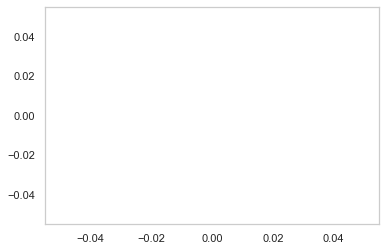

In [37]:
import itertools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def data_gen():
    for cnt in itertools.count():
        t = cnt / 10
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, interval=10, init_func=init)
plt.show()